In [4]:
import sys
sys.path.append('../')
import numpy
import pandas
import seaborn

from deepracer.tracks import TrackIO, Track

from reward import AWSReward, RewardFactory
import reward.awsreward as rewards
from utils.loader import get_df, load_sample_complete_laps
from utils.transformer import df_to_params, new_names_df, get_episode
from utils.new_rewards import aggregate_episode_reward, summary, plot_new_reward
track = TrackIO(base_path='../tracks').load_track("reinvent_base")

fname = '../logs/training-simulation-logs-w7.log'
full_df= get_df(fname)

Loaded 71 waypoints


## Define or load a new reward 

The function/object it should take a dictionary of params and return an object that can be casted to float

If you have a file with a function you can try to use the ``%%load`` magic to load it insted of copying it, just write ``%%load path/myfile.py`` in the first line of a cell an run it.

In [5]:
class NewReward(AWSReward):
    max_speed    = 1.0
    
    def _calculateReward(self):
        return self.x + self.y

In [12]:
aggregate_episode_reward?

Signature:
aggregate_episode_reward(
    df,
    reward_calculator,
    df_to_params,
    track,
    new_reward_name='new_reward',
)
Docstring:
!!! df should contain only one episode information
reward_calculator should be a callable that recieves a params dictionary and returns an object castable to float
df_to_params is a helper function that takes a series and transforms it into a dictionary of parameters
File:      ~/Code/deepracer/deepracer-analysis/utils/new_rewards.py
Type:      function


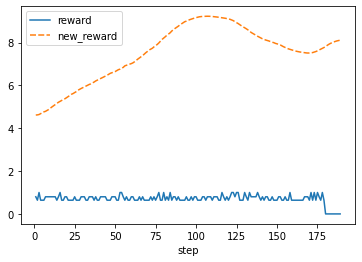

In [10]:
episode = 1
episode_df = aggregate_episode_reward(get_episode(full_df,episode), NewReward, df_to_params, track, 'new_reward')
plot_new_reward(df,['reward','new_reward'])

In [11]:
summary(episode_df,['new_reward'])

,,step,closest_waypoint_index,progress,speed,time,reward,duration,new_reward
iteration,episode,,,,,,,,
1,1,189,4,48.9639,0.629365,00:00:12,133.469,12.568453,1418.5668
